In [4]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.tools.visualization import plot_histogram
# Loading my IBMQ account
provider = IBMQ.load_account()

In [62]:
secretnumber = '1101' # Our Secret Number

In [63]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber)) 
# Create a circuit with, n+1 qubits and n classical bits in which we store the results.

circuit.h(range(len(secretnumber))) # Add H gate to all qubits
circuit.x(len(secretnumber)) # Add x gate at last qubit
circuit.h(len(secretnumber)) # Add H gate at last qubit

circuit.barrier() 

# For each 1 in secret number we applay CX gate
for ii, yesno in enumerate(reversed(secretnumber)): 
    if yesno == '1':                              
        circuit.cx(ii, len(secretnumber))        

circuit.barrier()
circuit.h(range(len(secretnumber))) 
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber))) # Measure the quibts

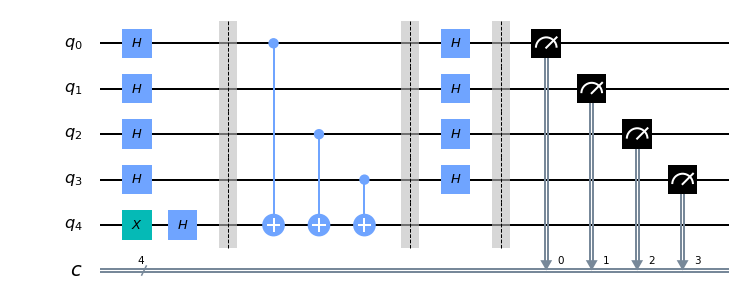

In [64]:
circuit.draw(output='mpl')

In [65]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()

In [66]:
print(counts)

{'1101': 1}


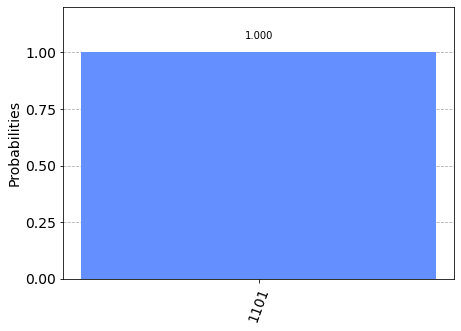

In [67]:
plot_histogram(result.get_counts(circuit)) # Visualization of result

In [29]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-17 19:18:35,701: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [69]:
provider = IBMQ.get_provider('ibm-q')

In [70]:
qcomp = provider.get_backend('ibmq_essex') #Now we will run the program on a real Quantum Computer

In [71]:
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


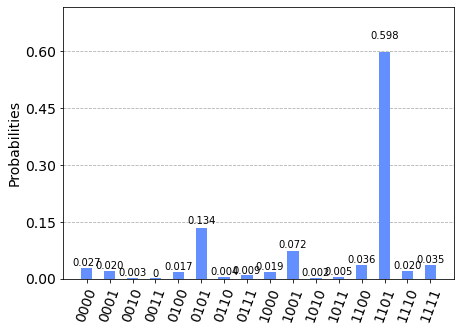

In [72]:
result = job.result()
plot_histogram(result.get_counts(circuit))
# The most probable answer is 1101 by 59.8%
# In simulator like, QASM Simulator it would find the 1101(The secret number) with 100%

In [73]:
import qiskit.tools.jupyter
%qiskit_copyright